<a href="https://colab.research.google.com/github/Ekaterina946/dls-gan/blob/Code/%D0%93%D0%B0%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

Был выбран CycleGAN.
Вначале реализуется своя архитектура на известной задаче яблоки/апельсины.

In [5]:
pip install tensorboardX

     |████████████████████████████████| 204kB 2.7MB/s 


In [6]:
pip install visdom

     |████████████████████████████████| 686kB 2.7MB/s 
     |████████████████████████████████| 204kB 12.7MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=1d0db7ada740fa472a1a78b8ace456b5a49246a9c7ea121af2ae1eddd155e622
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=e7fe41b618b72235183bda3e5cccb8ef95507305eb7ba0160d039e21908d4262
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time
import os
import errno
import torchvision.utils as vutils
from tensorboardX import SummaryWriter
from IPython import display
from matplotlib import pyplot as plt
import random
import time
import datetime
import sys
from torch.autograd import Variable
from visdom import Visdom
import itertools
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from PIL import Image
import glob
from torch.utils.data import Dataset
from IPython.display import clear_output

In [0]:
import pickle
from skimage import io

from tqdm import tqdm, tqdm_notebook
from pathlib import Path

from multiprocessing.pool import ThreadPool
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline


In [0]:
class G_generator(nn.Module):  #в качестве генератора использован юнет, что дает более четкий результат на сгенерированных картинках
      def __init__(self):
        super().__init__()

        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size = 3, padding=1),
            nn.InstanceNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 32, kernel_size = 3, padding=1),
            nn.InstanceNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            
        )
        self.pool0 =  nn.MaxPool2d(kernel_size = 2)
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size = 3, padding=1),
            nn.InstanceNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, kernel_size = 3, padding=1),
            nn.InstanceNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            
        )
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 128, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            
        )

        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 256, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
           
        )
        self.pool3 =  nn.MaxPool2d(kernel_size = 2)

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 512, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
        )

        # decoder (upsampling)
        self.upsample0 =  nn.UpsamplingBilinear2d(32)
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(768, 256, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 256, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
           
        )
        self.upsample1 = nn.UpsamplingBilinear2d(64)
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(384, 128, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 128, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            )
        self.upsample2 = nn.UpsamplingBilinear2d(128)
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(192, 64, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.upsample3 = nn.UpsamplingBilinear2d(256)
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(96, 32, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 32, kernel_size = 3,  padding=1),
            nn.InstanceNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 3, kernel_size = 1,  padding=0),

        )

         # encoder
     
      def forward(self, x):

        e0 = self.enc_conv0(x)
        e00 = self.pool0(e0)
        e1 = self.enc_conv1(e00)
        e11 = self.pool1(e1)
        e2 = self.enc_conv2(e11)
        e22 = self.pool2(e2)
        e3 = self.enc_conv3(e22)
        e33 = self.pool3(e3)

        # bottleneck
        b = self.bottleneck_conv(e33)

        # decoder
        
        d0 = self.upsample0(b)
        d00 = self.dec_conv0(torch.cat((e3, d0), dim = 1))
        d1 = self.upsample1(d00)
        d11 = self.dec_conv1(torch.cat((e2, d1), dim = 1))
        d2 = self.upsample2(d11)
        d22 = self.dec_conv2(torch.cat((e1, d2), dim = 1))
        d3 = self.upsample3(d22)
        d33 = self.dec_conv3(torch.cat((e0, d3), dim = 1))


        return d33


In [0]:
class G_discriminator(nn.Module):  #использовалась статейная архитектура
    def __init__(self):
          super().__init__()

          self.conv1 = nn.Sequential(
              nn.Conv2d(3, 64, kernel_size = 4, stride=2, padding=1),
              nn.InstanceNorm2d(64),
              nn.LeakyReLU(inplace=True),
          )
          self.conv2 = nn.Sequential(
              nn.Conv2d(64, 128, kernel_size = 4, stride=2, padding=1),
              nn.InstanceNorm2d(128),
              nn.LeakyReLU(inplace=True),
          )
          self.conv3 = nn.Sequential(
              nn.Conv2d(128, 256, kernel_size = 4, stride=2, padding=1),
              nn.InstanceNorm2d(256),
              nn.LeakyReLU(inplace=True),
          )
          self.conv4 = nn.Sequential(
              nn.Conv2d(256, 512, kernel_size = 4, padding=1),
              nn.InstanceNorm2d(512),
              nn.LeakyReLU(inplace=True),
          )
          self.fin = nn.Sequential(
              nn.Conv2d(512,   1, kernel_size = 4, padding=1)
          )

    def forward(self, x):
        e1 = self.conv1(x)
        e2 = self.conv2(e1)
        e3 = self.conv3(e2)
        e4 = self.conv4(e3)
        e5 = self.fin(e4)

        return F.avg_pool2d(e5, e5.size()[2:]).view(e5.size()[0], -1)






In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [0]:
class ReplayBuffer():
    def __init__(self, max_size=50):
        assert (max_size > 0), 'Empty buffer or trying to create a black hole. Be careful.'
        self.max_size = max_size
        self.data = []

    def push_and_pop(self, data):
        to_return = []
        for element in data.data:
            element = torch.unsqueeze(element, 0)
            if len(self.data) < self.max_size:
                self.data.append(element)
                to_return.append(element)
            else:
                if random.uniform(0,1) > 0.5:
                    i = random.randint(0, self.max_size-1)
                    to_return.append(self.data[i].clone())
                    self.data[i] = element
                else:
                    to_return.append(element)
        return Variable(torch.cat(to_return))

In [7]:
# загрузка и подготовка даты
! wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/apple2orange.zip

--2020-06-11 10:37:32--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/apple2orange.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78456409 (75M) [application/zip]
Saving to: ‘apple2orange.zip.1’

apple2orange.zip.1  100%[===================>]  74.82M  19.3MB/s    in 4.4s    

2020-06-11 10:37:37 (16.9 MB/s) - ‘apple2orange.zip.1’ saved [78456409/78456409]



In [0]:
!unzip /content/apple2orange.zip #распаковка

In [0]:
class AppleOrangeDataset(Dataset): 


    def __init__(self, files, files1):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        self.len_ = len(self.files)
        self.files1 = sorted(files1)
        self.len1_ = len(self.files1)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        y = self.load_sample(self.files1[index])
        y = self._prepare_sample(y)
        y = np.array(y / 255, dtype='float32')
        y = transform(y)

        return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((256, 256))
        return np.array(image)

In [0]:
def imshow(inp, title=None, plt_ax=plt, default=False):

    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [0]:
train_apple = Path('/content/apple2orange/trainA')
train_orange = Path('/content/apple2orange/trainB')

apple_files = sorted(list(train_apple.rglob('*.jpg')))
orange_files = sorted(list(train_orange.rglob('*.jpg')))

In [0]:
apples = []
oranges = []
for filename in apple_files:
  apples.append(str(filename))

for filename in orange_files:
  oranges.append(str(filename)) 

In [0]:
num = torch.randint(0, len(apples), ((len(oranges) - len(apples),))) # Пусть размеры сетов будут одинаковыми
for i in num:
  apples.append(apples[i])

In [19]:
len(oranges)

1019

In [20]:
len(apples)

1019

In [0]:
train_dataset = AppleOrangeDataset(oranges, apples)

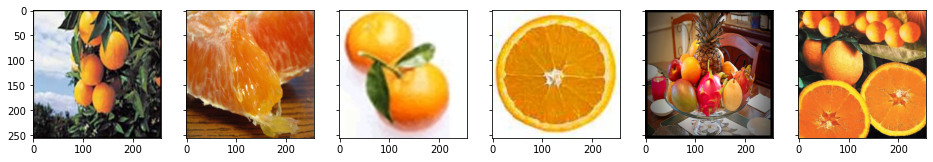

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=6,figsize=(16, 16), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val = train_dataset[random_characters][0]
    imshow(im_val.data.cpu(), plt_ax=fig_x)

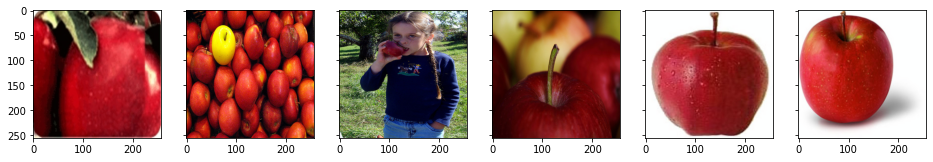

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=6,figsize=(16, 16), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val = train_dataset[random_characters][1]
    imshow(im_val.data.cpu(), plt_ax=fig_x)

In [0]:
test_orange = Path('/content/apple2orange/testB')
test_apple = Path('/content/apple2orange/testA')

apple_test_files = sorted(list(test_apple.rglob('*.jpg')))
orange_test_files = sorted(list(test_orange.rglob('*.jpg')))
apples_test = []
oranges_test = []
for filename in apple_test_files:
  apples_test.append(str(filename))

for filename in orange_test_files:
  oranges_test.append(str(filename)) 

In [0]:
num = torch.randint(0, len(oranges_test), ((len(apples_test) - len(oranges_test),)))
for i in num:
  oranges_test.append(oranges_test[i])

In [26]:
len(apples_test)

266

In [27]:
len(oranges_test)

266

In [0]:
test_dataset = AppleOrangeDataset(oranges_test, apples_test)

In [0]:
def for_show(inp):
              inp = inp.transpose((1, 2, 0))
              mean = np.array([0.485, 0.456, 0.406])
              std = np.array([0.229, 0.224, 0.225])
              inp = std * inp + mean
              inp = np.clip(inp, 0, 1)
              return inp

In [0]:
def train(train_dataset, test_dataset, opt_n_epochs = 120, opt_batchSize = 8): 

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)
    # модели дискриминатора и генератора
    netG_X2Y = G_generator().to(device)
    netG_Y2X = G_generator().to(device)
    netD_X = G_discriminator().to(device)
    netD_Y = G_discriminator().to(device)

    # лосс
    criterion_GAN = torch.nn.MSELoss()
    criterion_cycle = torch.nn.L1Loss()
    criterion_identity = torch.nn.L1Loss()
    # оптимизаторы
    optimizer_G = torch.optim.Adam(itertools.chain(netG_X2Y.parameters(), netG_Y2X.parameters()),
                                lr=0.0002, betas=(0.5, 0.999))
    optimizer_D_X = torch.optim.Adam(netD_X.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_D_Y = torch.optim.Adam(netD_Y.parameters(), lr=0.0002, betas=(0.5, 0.999))


    target_real = Variable(torch.ones([1]).to(device), requires_grad=False)
    target_fake = Variable(torch.zeros([1]).to(device), requires_grad=False)



    fake_X_buffer = ReplayBuffer()
    fake_Y_buffer = ReplayBuffer()

    for epoch in range(opt_n_epochs):

        netG_X2Y.train()
        netG_Y2X.train()

        netD_X.train()
        netD_Y.train()
        for X, Y in train_loader:

              

              real_X = Variable(X).to(device)
              real_Y = Variable(Y).to(device)

              optimizer_G.zero_grad()

              same_Y = netG_X2Y(real_Y)
              loss_identity_Y = criterion_identity(same_Y, real_Y)*5.0

              same_X = netG_Y2X(real_X)
              loss_identity_X = criterion_identity(same_X, real_X)*4.0

              fake_Y = netG_X2Y(real_X)
              pred_fake = netD_Y(fake_Y)
              loss_GAN_X2Y = criterion_GAN(pred_fake, target_real)


              fake_X = netG_Y2X(real_Y)
              pred_fake = netD_X(fake_X)
              loss_GAN_Y2X = criterion_GAN(pred_fake, target_real)

              recovered_X = netG_Y2X(fake_Y)
              loss_cycle_XYX = criterion_cycle(recovered_X, real_X)*10.0

              recovered_Y = netG_X2Y(fake_X)
              loss_cycle_YXY = criterion_cycle(recovered_Y, real_Y)*10.0


              loss_G = loss_identity_X + loss_identity_Y + loss_GAN_X2Y + loss_GAN_Y2X + loss_cycle_XYX + loss_cycle_YXY
              loss_G.backward()


              optimizer_G.step()

              optimizer_D_X.zero_grad()

              pred_real = netD_X(real_X)
              loss_D_real = criterion_GAN(pred_real, target_real)


              fake_X = fake_X_buffer.push_and_pop(fake_X)
              pred_fake = netD_X(fake_X.detach())
              loss_D_fake = criterion_GAN(pred_fake, target_fake)

              loss_D_X = (loss_D_real + loss_D_fake)*0.5
              loss_D_X.backward()

              optimizer_D_X.step()
        
              optimizer_D_Y.zero_grad()

          
              pred_real = netD_Y(real_Y)
              loss_D_real = criterion_GAN(pred_real, target_real)
            
            
              fake_Y = fake_Y_buffer.push_and_pop(fake_Y)
              pred_fake = netD_Y(fake_Y.detach())
              loss_D_fake = criterion_GAN(pred_fake, target_fake)

 
              loss_D_Y = (loss_D_real + loss_D_fake)*0.5
              loss_D_Y.backward()

              optimizer_D_Y.step()

        # eval mode


        netG_X2Y.eval()
        netG_Y2X.eval()

        netD_X.eval()
        netD_Y.eval()
        with torch.no_grad():
              clear_output(wait=True)
              fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(20, 20), \
                        sharey=True, sharex=True)
              
              real_X, real_Y = next(iter(test_loader))
              real_X = Variable(real_X).to(device)
              real_Y = Variable(real_Y).to(device)
              
              fake_Y = netG_X2Y(real_X) 
              recovered_X = netG_Y2X(fake_Y)
              recovered_X = recovered_X.detach().to('cpu').numpy()
              fake_Y = fake_Y.detach().to('cpu').numpy()
              real_X = real_X.detach().to('cpu').numpy()

              fake_X = netG_Y2X(real_Y) 
              recovered_Y = netG_X2Y(fake_X)
              recovered_Y = recovered_Y.detach().to('cpu').numpy()
              fake_X = fake_X.detach().to('cpu').numpy()
              real_Y = real_Y.detach().to('cpu').numpy()
              #отрисовка результатов на test 

              plt.subplot(2, 3, 1)
              plt.imshow(for_show(real_X[0]))
              plt.title('Real_X')
              plt.axis('off')

              plt.subplot(2, 3, 2)
              plt.imshow(for_show(fake_Y[0]))
              plt.title('fake_Y')
              plt.axis('off')

              plt.subplot(2, 3, 3)
              plt.imshow(for_show(recovered_X[0]))
              plt.title('recovered_X')
              plt.axis('off')

              plt.subplot(2, 3, 4)
              plt.imshow(for_show(real_Y[0]))
              plt.title('Real_Y')
              plt.axis('off')

              plt.subplot(2, 3, 5)
              plt.imshow(for_show(fake_X[0]))
              plt.title('fake_X')
              plt.axis('off')

              plt.subplot(2, 3, 6)
              plt.imshow(for_show(recovered_Y[0]))
              plt.title('recovered_Y')
              plt.axis('off')
              plt.suptitle('%d / %d - loss_G: %f,     loss_D: %f' % (epoch+1, opt_n_epochs, loss_G, (loss_D_X + loss_D_Y)))
              plt.show()







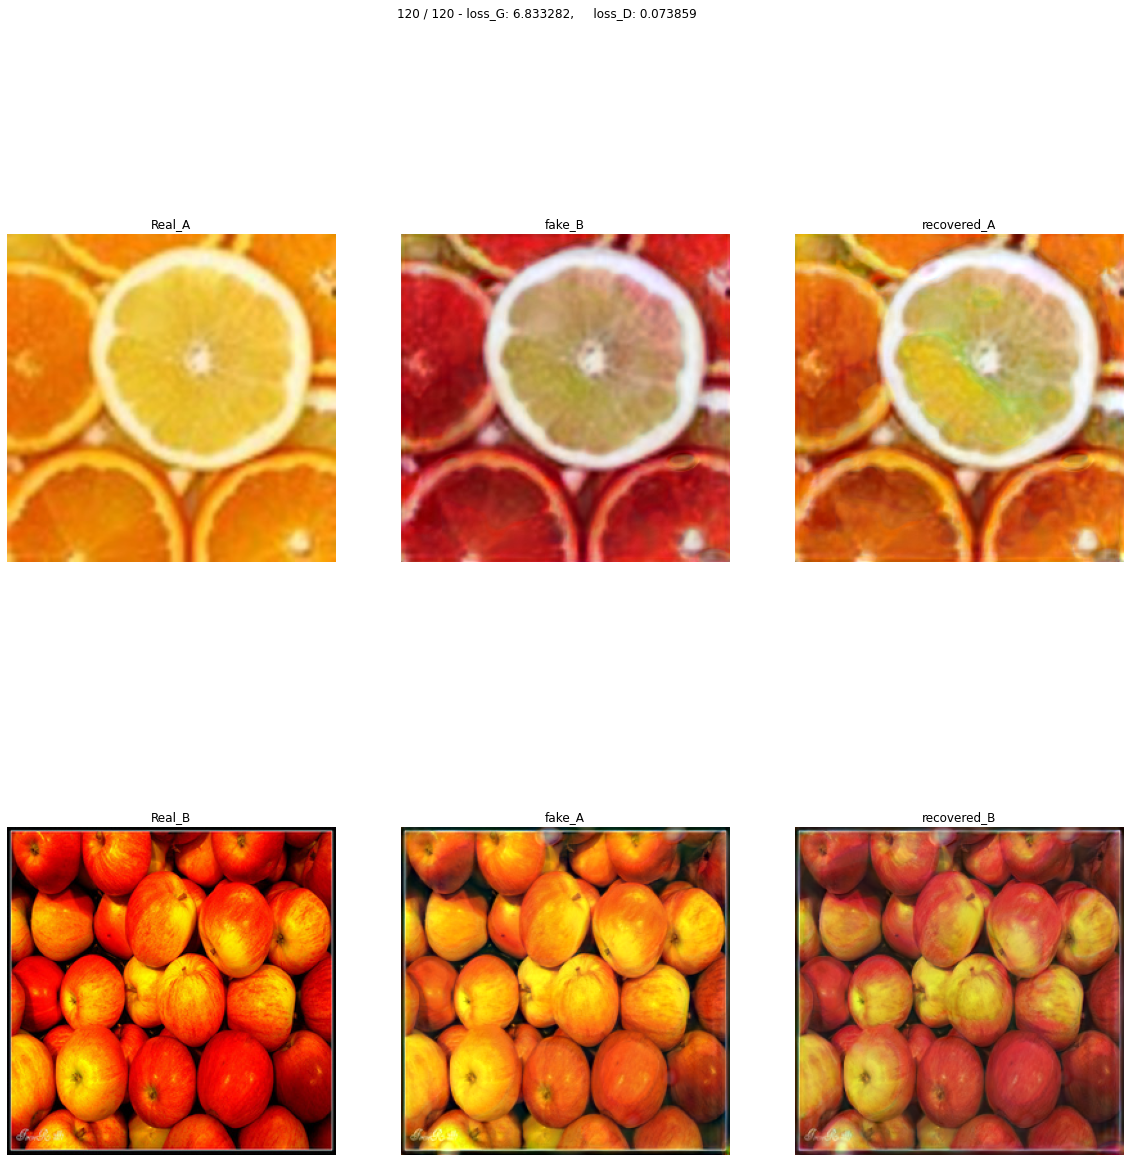

In [0]:
train(train_dataset, test_dataset)

Работает хорошо, возникают проблемы с зелеными яблоками и с апельсинами в разрезе.

#Своя задача

Ниже представлена задача, в которой красные и белые машины меняют цвета.


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip /content/drive/My\ Drive/TrainA.zip 

In [0]:
!unzip /content/drive/My\ Drive/TrainB.zip 

In [0]:
!unzip /content/drive/My\ Drive/TestA.zip 

In [0]:
!unzip /content/drive/My\ Drive/TestB.zip 

In [0]:
class Cars(Dataset):


    def __init__(self, files, files1):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        self.len_ = len(self.files)
        self.files1 = sorted(files1)
        self.len1_ = len(self.files1)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        y = self.load_sample(self.files1[index])
        y = self._prepare_sample(y)
        y = np.array(y / 255, dtype='float32')
        y = transform(y)

        return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((256, 256))
        return np.array(image)

In [0]:
train_white = Path('/content/TrainA')
train_red = Path('/content/TrainB')

white_files = sorted(list(train_white.rglob('*.jpg')))
red_files = sorted(list(train_red.rglob('*.jpg')))

In [0]:
white = []
red = []
for filename in white_files:
  white.append(str(filename))

for filename in red_files:
  red.append(str(filename)) 

In [42]:
len(white)

1042

In [0]:
new_white = []

def prov(file): #в датасете есть черно-белые картинки поэтому я их убираю
  transform = transforms.ToTensor()
  image = Image.open(file)
  image.load()
  image = np.array(image.resize((256, 256)))
  image = np.array(image / 255, dtype='float32')
  image = transform(image)
  return image
for file in white_files:
  if len(prov(file)) == 3:
    new_white.append(file)

In [41]:
len(new_white)

1037

In [0]:
num = torch.randint(0, len(new_white), ((len(red) - len(new_white),))) 
for i in num:
  new_white.append(new_white[i])

In [44]:
len(red)

1056

In [45]:
len(new_white)

1056

In [0]:
train_dataset = Cars(red, new_white)

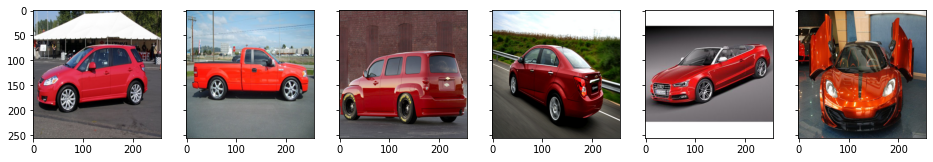

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=6,figsize=(16, 16), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val = train_dataset[random_characters][0]
    imshow(im_val.data.cpu(), plt_ax=fig_x)

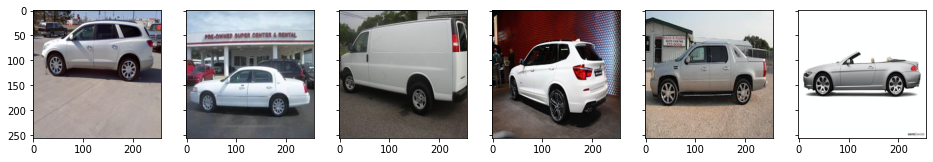

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=6,figsize=(16, 16), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val = train_dataset[random_characters][1]
    imshow(im_val.data.cpu(), plt_ax=fig_x)

In [0]:
test_red = Path('/content/TestB')
test_white = Path('/content/TestA')

white_test_files = sorted(list(test_white.rglob('*.jpg')))
red_test_files = sorted(list(test_red.rglob('*.jpg')))
white_test = []
red_test = []
for filename in white_test_files:
  white_test.append(str(filename))

for filename in red_test_files:
  red_test.append(str(filename)) 

In [50]:
len(white_test)

150

In [51]:
len(red_test)

150

In [0]:
test_dataset = Cars(red_test, white_test)

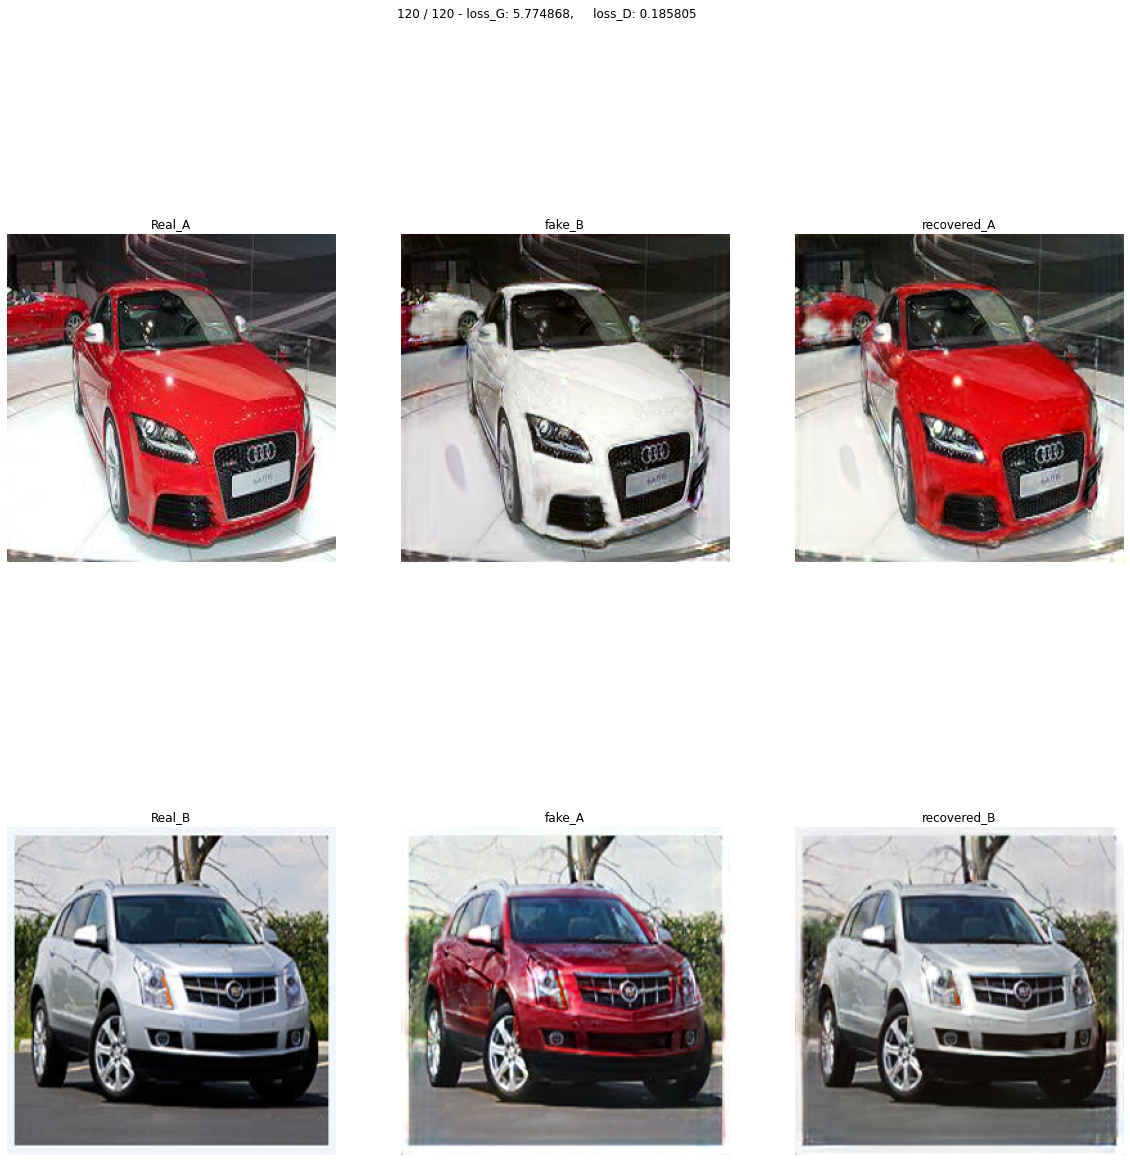

In [0]:
train(train_dataset, test_dataset)

#Gan на датасете MNIST.

Код взят из статьи и использовался только для того, чтобы ближе познакомиться с Ganом и понять как происходит обучение и какие результаты дает.

In [0]:
pip install utils

In [0]:
pip install Logger

  Created wheel for Logger: filename=logger-1.4-cp36-none-any.whl size=1789 sha256=776c611bda680a26854f2b7c2498bbf0005b47ba640bd08c42778147eae7ad98
  Stored in directory: /root/.cache/pip/wheels/91/d4/96/08341e2ac92c1ed4b760e4848e1acda3795f0257a83b94b42e
Successfully built Logger


In [0]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets

In [0]:
def mnist_data():
    compose = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])
    out_dir = './dataset'
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)
# Load data
data = mnist_data()
# Create loader with data, so that we can iterate over it
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True)
# Num batches
num_batches = len(data_loader)

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw




Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
discriminator = DiscriminatorNet().to(device)

In [0]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [0]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet().to(device)

In [0]:
def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

In [0]:
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)

In [0]:
loss = nn.BCELoss()

In [0]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

In [0]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data.to(device))
    # Calculate error and backpropagate
    error_real = loss(prediction_real.to(device), ones_target(N).to(device) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data.cuda())
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake.to(device), zeros_target(N).to(device))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [0]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data.cuda())
    # Calculate error and backpropagate
    error = loss(prediction.to(device), ones_target(N).to(device))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [0]:
num_test_samples = 16
test_noise = noise(num_test_samples)

In [0]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 200
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        # n_batch, real_batch = n_batch.cuda(), real_batch.cuda()
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N).to(device)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N).to(device))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise.to(device)))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )

TypeError: ignored